In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date

%matplotlib inline

In [2]:
!pip install arch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.4/983.4 kB 10.7 MB/s eta 0:00:00


In [3]:
!pip3 install yfinance

In [6]:
import yfinance as yf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from datetime import datetime, timedelta
from sklearn.metrics import (mean_squared_error as mse)

BTC-USD

In [7]:
start = datetime(2014, 1, 1)
end = datetime.today()

tckr = 'BTC-USD'

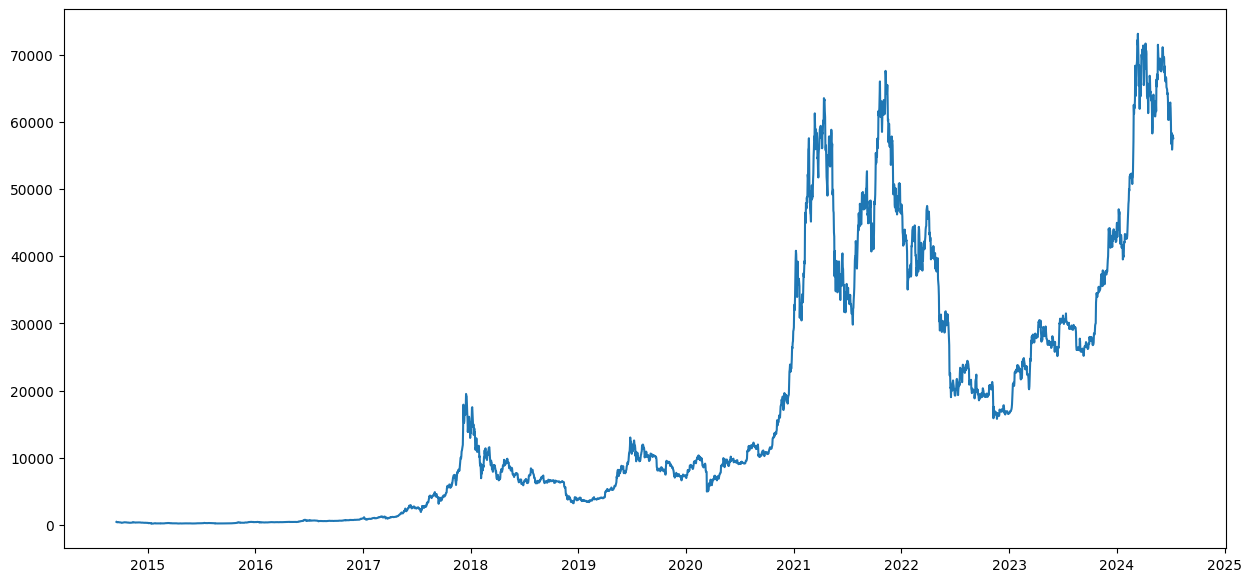

In [8]:
ticker = yf.Ticker(tckr)
ticker_historical = ticker.history(start=start,
                                   end=end,
                                   interval="1d")

plt.figure(figsize=(15,7))
plt.plot(ticker_historical.Close);

In [9]:
ticker_historical.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,0.0,0.0
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,0.0,0.0
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,0.0,0.0
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,0.0,0.0
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,0.0,0.0


In [10]:
# CALCULATE PRICE RETURNS AS DAILY PERCENTAGE CHANGE USING pct_change()
returns = 100 * ticker_historical.Close.pct_change().dropna()

In [11]:
# CALCULATE LOG RETURNS BASED ON ABOVE FORMULA
log_returns = np.log(ticker_historical.Close/ticker_historical.Close.shift(1)).dropna()

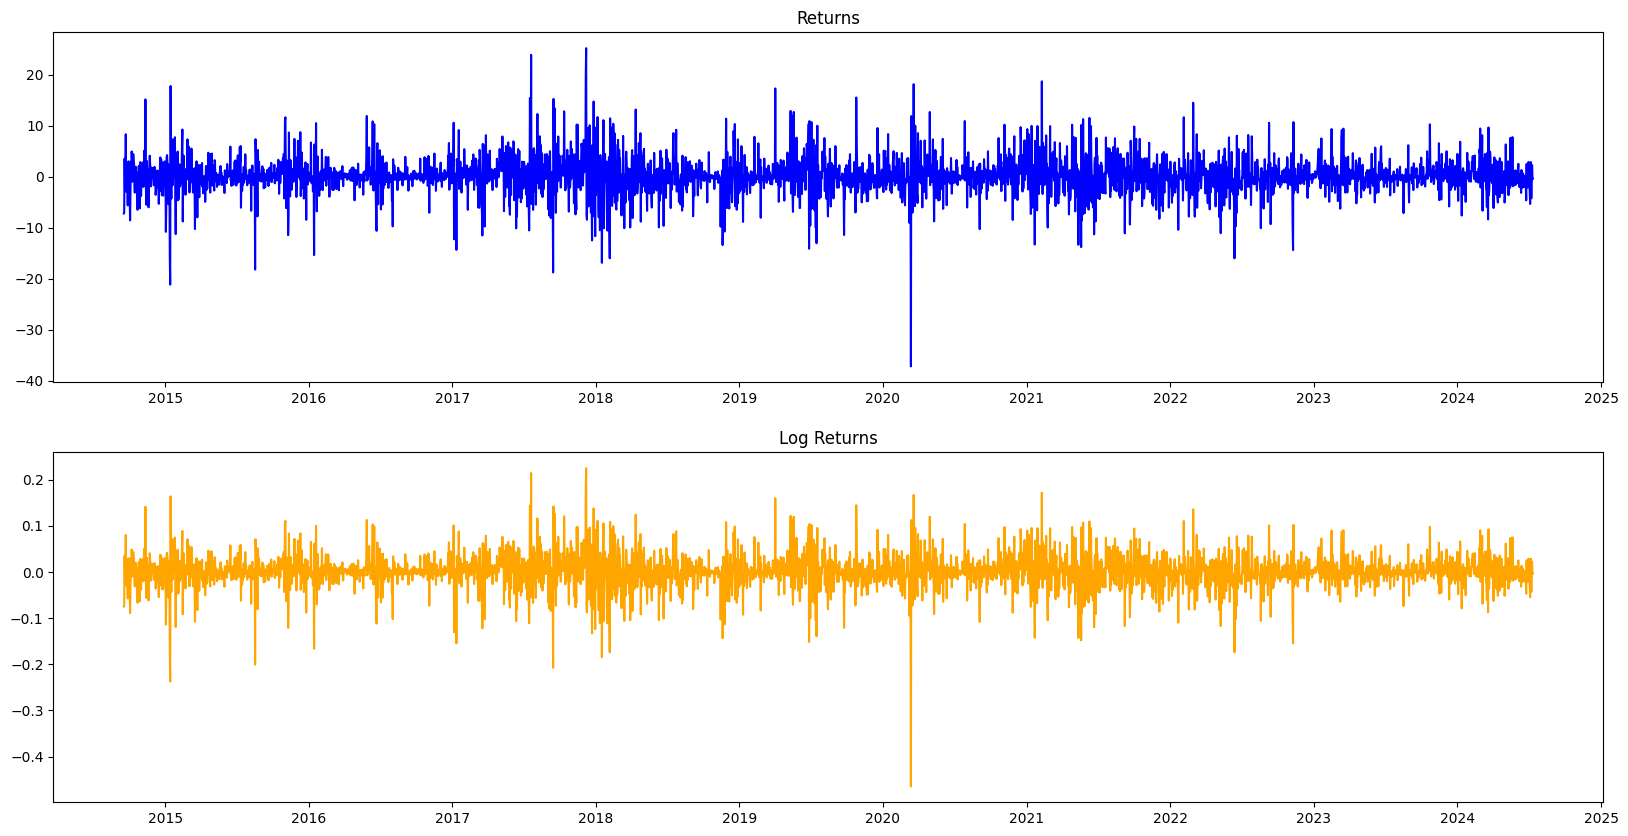

In [12]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(20,10))

ax1.plot(returns, color='blue')
ax1.set_title('Returns')

ax2.plot(log_returns, color='orange')
ax2.set_title('Log Returns')

fig.show();

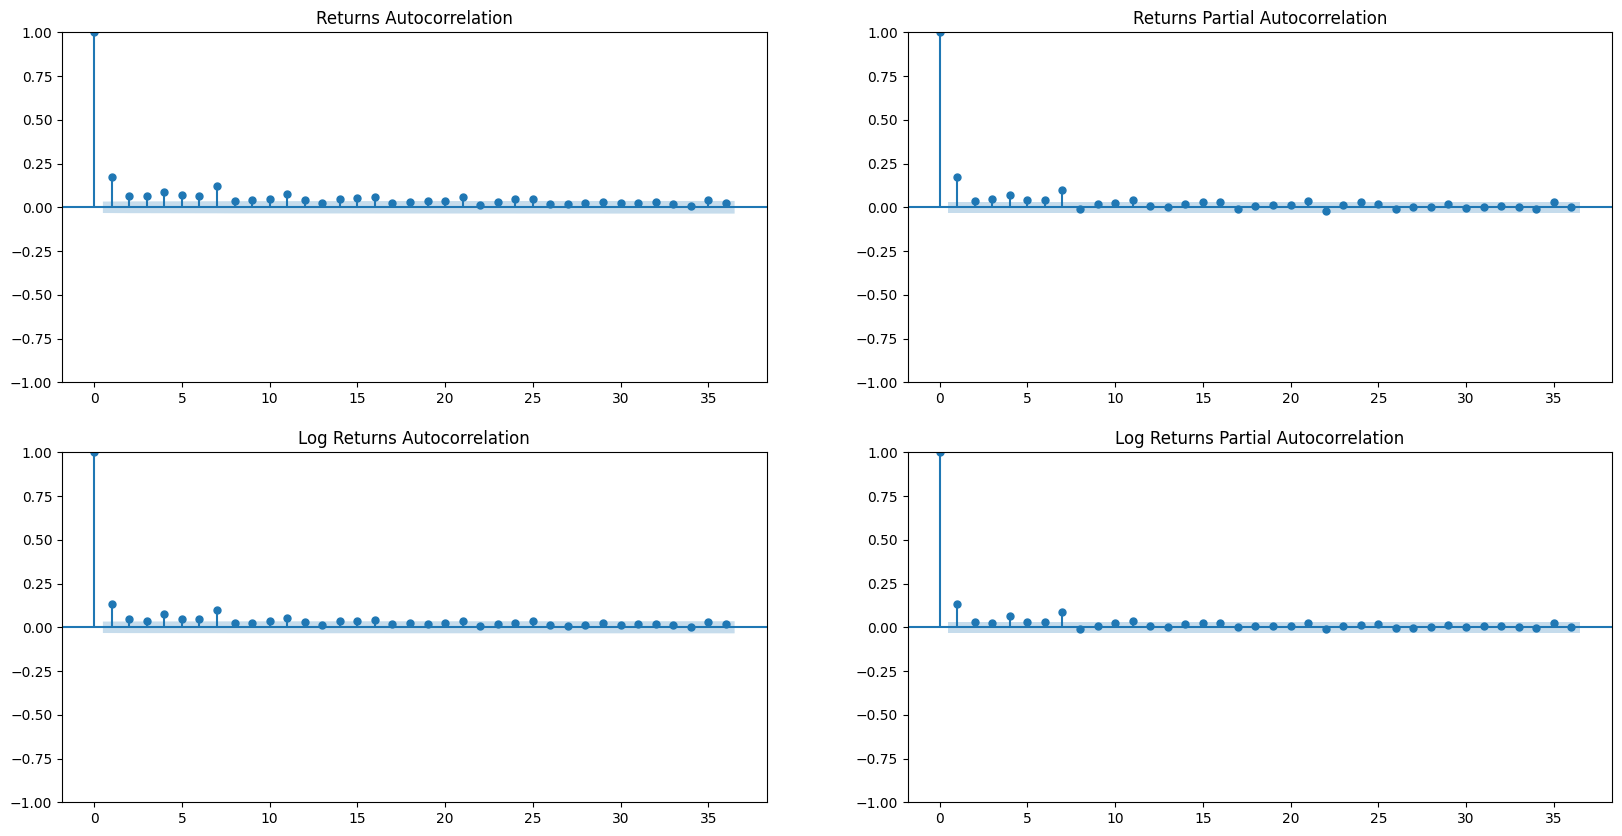

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20,10))

plot_acf(returns**2, ax=axes[0][0])
plot_pacf(returns**2, ax=axes[0][1])
axes[0][0].set_title('Returns Autocorrelation')
axes[0][1].set_title('Returns Partial Autocorrelation')

plot_acf(log_returns**2, ax=axes[1][0])
plot_pacf(log_returns**2, ax=axes[1][1])
axes[1][0].set_title('Log Returns Autocorrelation')
axes[1][1].set_title('Log Returns Partial Autocorrelation')

fig.show();

In [14]:
returns.describe()

count    3585.000000
mean        0.202415
std         3.657953
min       -37.169539
25%        -1.259278
50%         0.131961
75%         1.702032
max        25.247169
Name: Close, dtype: float64

In [15]:
log_returns.describe()

count    3585.000000
mean        0.001349
std         0.036852
min        -0.464730
25%        -0.012673
50%         0.001319
75%         0.016877
max         0.225119
Name: Close, dtype: float64

In [16]:
from scipy import stats

<ipython-input-17-925f103b87b8>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(returns, norm_hist=True, fit=stats.norm,
<ipython-input-17-925f103b87b8>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(log_returns, norm_hist=True, fit=stats.norm,


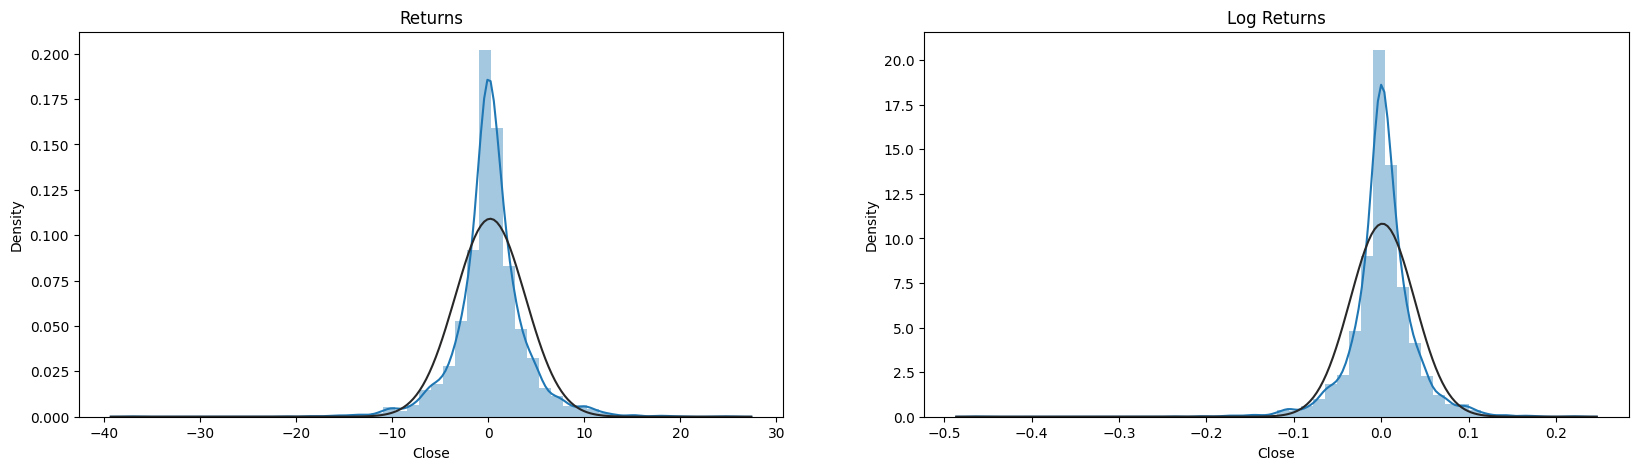

In [17]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,5))
sns.distplot(returns, norm_hist=True, fit=stats.norm,
             bins=50, ax=ax1)
ax1.set_title('Returns')

sns.distplot(log_returns, norm_hist=True, fit=stats.norm,
             bins=50, ax=ax2)
ax2.set_title('Log Returns')

fig.show();

In [18]:
def get_volatility(ts, window=None):
    """
    Get the volatility of a time series as the standard deviation of an index's
    price returns using cumulative moving average or rolling window average
    depending on whether or not window parameter is specified
    """
    if window:
        ma = ts.rolling(window).mean()
    else:
        ma = ts.expanding().mean()
    output = ((ts - ma)**2)**.5

    return output

In [19]:
from statsmodels.tsa.stattools import adfuller

In [20]:
adfuller_results = adfuller(returns)

print(f'ADF Statistic: {adfuller_results[0]}')
print(f'p-value: {adfuller_results[1]}')
print('Critical Values:')
for key, value in adfuller_results[4].items():
    print(f'{key}: {value:.4f}')

ADF Statistic: -61.19840286344414
p-value: 0.0
Critical Values:
1%: -3.4322
5%: -2.8623
10%: -2.5672


In [21]:
(len(returns)-7)*.8

2862.4

In [22]:
split_time_1 = 2000
split_time_2 = 2500

train_idx = returns.index[:split_time_1]
val_idx = returns.index[split_time_1:split_time_2]
test_idx = returns.index[split_time_2:]

In [23]:
returns.index[2000]

Timestamp('2020-03-10 00:00:00+0000', tz='UTC')

In [24]:
ts_train = returns[train_idx]
ts_val = returns[val_idx]
ts_test = returns[test_idx]

In [25]:
WINDOW_SIZE = 14

# CALCULATING VOLATILITY ON A 14 DAY PERIOD
vols = get_volatility(returns, window=WINDOW_SIZE)

vol_train = vols[train_idx]
vol_val = vols[val_idx]
vol_test = vols[test_idx]

In [26]:
ma = returns.rolling(WINDOW_SIZE).mean()
ewma = returns.ewm(span=WINDOW_SIZE).mean()

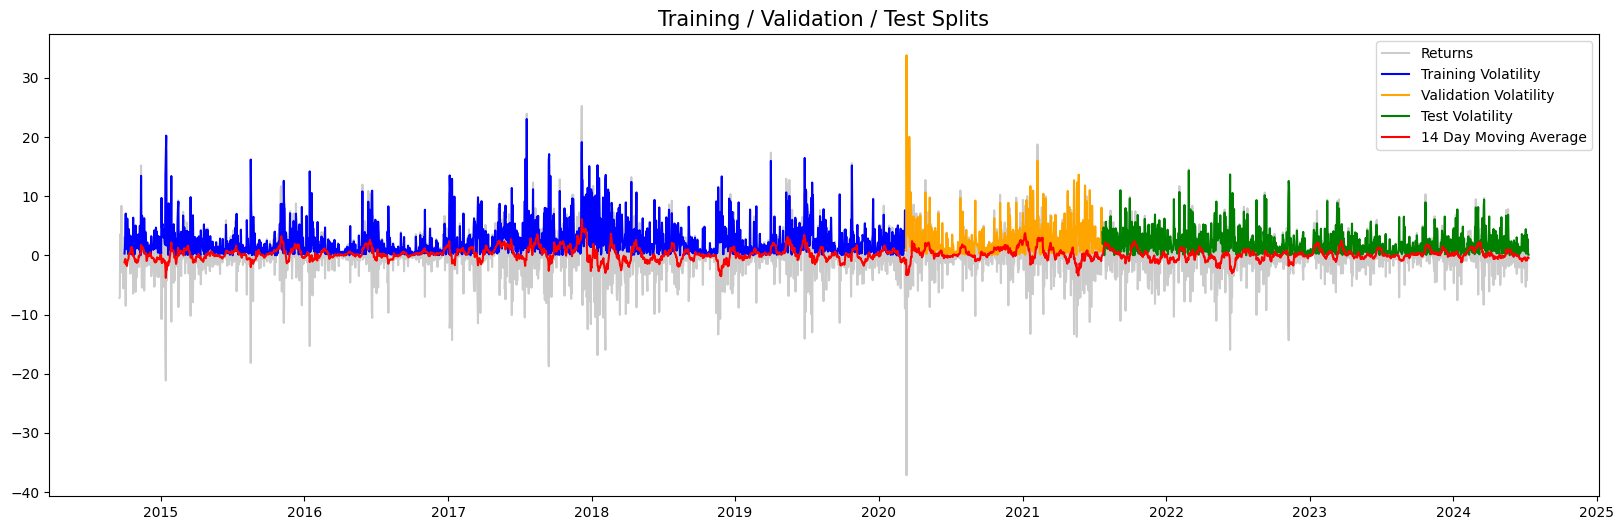

In [27]:
plt.figure(figsize=(20,6))

plt.plot(returns, color='gray', label='Returns', alpha=0.4)
# plt.plot(ts_val, color='gray', label='Validation Returns', alpha=0.4)
# plt.plot(ts_test, color='gray', label='Test Returns', alpha=0.4)

plt.plot(vol_train, color='blue', label='Training Volatility')
plt.plot(vol_val, color='orange', label='Validation Volatility')
plt.plot(vol_test, color='green', label='Test Volatility')

plt.plot(ma, color='red',
         label=f'{WINDOW_SIZE} Day Moving Average')

plt.plot()
plt.title('Training / Validation / Test Splits', fontsize=15)
plt.legend()
plt.show();